### Importación de datos



In [2]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



# **Ingreso total por cada tienda**

In [52]:
suma_total_por_tienda = (
    tienda['Precio'].sum(), 
    tienda2['Precio'].sum(), 
    tienda3['Precio'].sum(), 
    tienda4['Precio'].sum()
)

nombres_tiendas = ["Tienda", "Tienda 2", "Tienda 3", "Tienda 4"]

print("--- Suma Total de Precios por Tienda ---")

for nombre, suma in zip(nombres_tiendas, suma_total_por_tienda):
    print(f"La suma total de '{nombre}' es: ${suma:,.0f}")

--- Suma Total de Precios por Tienda ---
La suma total de 'Tienda' es: $1,150,880,400
La suma total de 'Tienda 2' es: $1,116,343,500
La suma total de 'Tienda 3' es: $1,098,019,600
La suma total de 'Tienda 4' es: $1,038,375,700


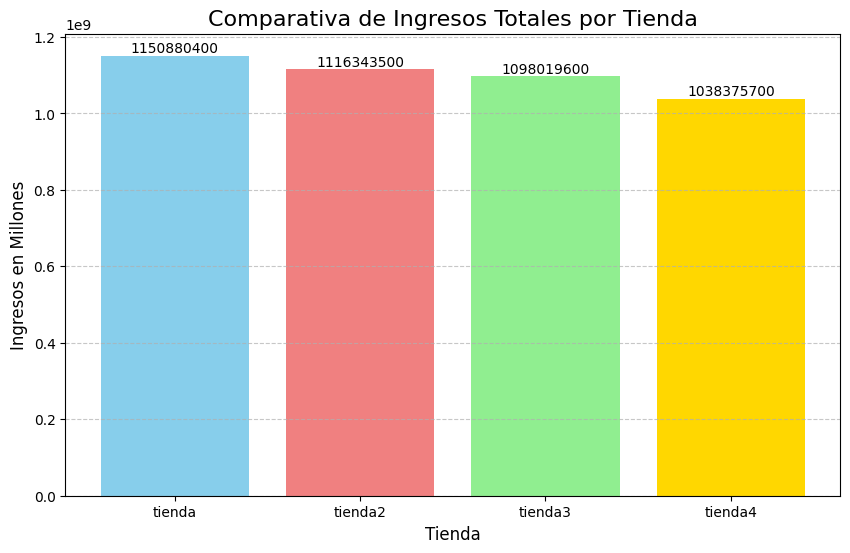

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

suma_total_por_tienda = (
    tienda['Precio'].sum(), 
    tienda2['Precio'].sum(), 
    tienda3['Precio'].sum(), 
    tienda4['Precio'].sum()
)

nombres_tiendas = ["tienda", "tienda2", "tienda3", "tienda4"]

df_ventas = pd.DataFrame({
    'Tienda': nombres_tiendas,
    'Ingresos Totales': suma_total_por_tienda
})

plt.figure(figsize=(10, 6))

barras = plt.bar(df_ventas['Tienda'], df_ventas['Ingresos Totales'], color=['skyblue', 'lightcoral', 'lightgreen', 'gold'])

for bar in barras:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, int(yval), ha='center', va='bottom', fontsize=10)

plt.title('Comparativa de Ingresos Totales por Tienda', fontsize=16)
plt.xlabel('Tienda', fontsize=12)
plt.ylabel('Ingresos en Millones', fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

# 2. Ventas por categoría

In [66]:
dataframes_tiendas = [tienda, tienda2, tienda3, tienda4]
nombres_tiendas = ["tienda", "tienda 2", "tienda 3", "tienda 4"]

def analizar_ventas(df, nombre_tienda):
        
    ventas_por_categoria_producto = df.groupby(['Categoría del Producto', "Producto"]).size()
    df_ventas = ventas_por_categoria_producto.reset_index(name='Cantidad de Ventas')
    
    print("\n" + "="*80)
    print(f"Cantidad de Productos Vendidos por Categoría y Producto en {nombre_tienda}:")
    print("="*80)
    print(df_ventas.to_string(index=False))

    categorias_populares = df['Categoría del Producto'].value_counts()
    
    print("\n" + "-"*80)
    print(f"Categorías Más Populares en {nombre_tienda}:")
    print("-"*80)
    print(categorias_populares)
    

for df, nombre in zip(dataframes_tiendas, nombres_tiendas):
    analizar_ventas(df, nombre)



Cantidad de Productos Vendidos por Categoría y Producto en tienda:
 Categoría del Producto                    Producto  Cantidad de Ventas
Artículos para el hogar                  Cubertería                  52
Artículos para el hogar             Olla de presión                  35
Artículos para el hogar                Set de ollas                  43
Artículos para el hogar                Set de vasos                  41
   Deportes y diversión         Balón de baloncesto                  55
   Deportes y diversión           Balón de voleibol                  42
   Deportes y diversión                   Bicicleta                  54
   Deportes y diversión          Cuerda para saltar                  40
   Deportes y diversión                     Mochila                  39
   Deportes y diversión                Vaso térmico                  54
      Electrodomésticos                      Estufa                  45
      Electrodomésticos            Lavadora de ropa                 

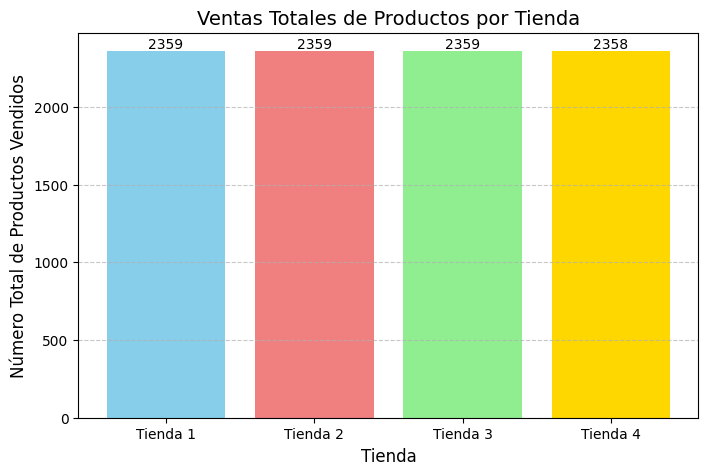

In [84]:
dataframes_tiendas = [tienda, tienda2, tienda3, tienda4]
nombres_tiendas = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]

def analizar_ventas(df, nombre_tienda):

    return len(df) 
    
ventas_totales_lista = [analizar_ventas(df, nombre) for df, nombre in zip(dataframes_tiendas, nombres_tiendas)]


df_grafico = pd.DataFrame({
    'Tienda': nombres_tiendas,
    'Ventas Totales': ventas_totales_lista
})

plt.figure(figsize=(8, 5))
barras = plt.bar(df_grafico['Tienda'], df_grafico['Ventas Totales'], color=['skyblue', 'lightcoral', 'lightgreen', 'gold']) 

for bar in barras:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, int(yval), ha='center', va='bottom', fontsize=10)

plt.title('Ventas Totales de Productos por Tienda', fontsize=14)
plt.xlabel('Tienda', fontsize=12)
plt.ylabel('Número Total de Productos Vendidos', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

# 3. Calificación promedio de la tienda


In [29]:
(tienda['Calificación'].mean(), tienda2['Calificación'].mean(), tienda3['Calificación'].mean(), tienda4['Calificación'].mean())

print(f"El promedio de Calificación del tienda es: {tienda['Calificación'].mean():.2f}")
print(f"El promedio de Calificación del tienda 2 es: {tienda2['Calificación'].mean():.2f}")
print(f"El promedio de Calificación del tienda 3 es: {tienda3['Calificación'].mean():.2f}")
print(f"El promedio de Calificación del tienda 4 es: {tienda4['Calificación'].mean():.2f}")

El promedio de Calificación del tienda es: 3.98
El promedio de Calificación del tienda 2 es: 4.04
El promedio de Calificación del tienda 3 es: 4.05
El promedio de Calificación del tienda 4 es: 4.00


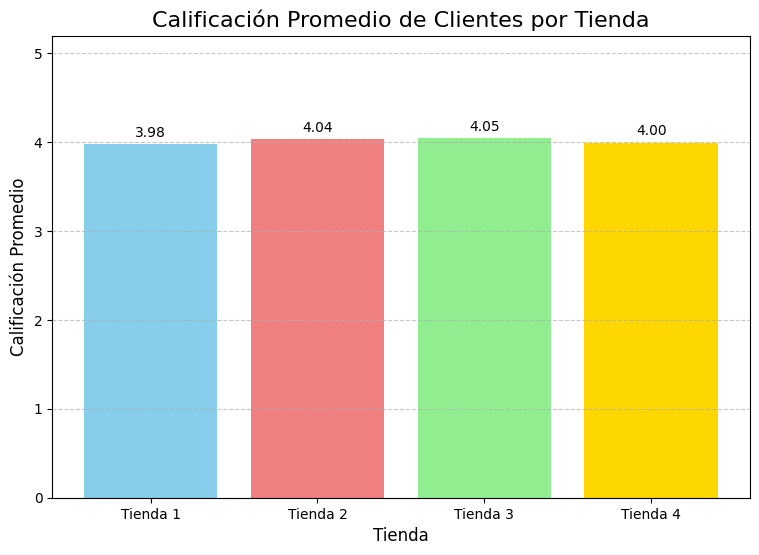

In [88]:
promedios_calificacion = (
    tienda['Calificación'].mean(), 
    tienda2['Calificación'].mean(), 
    tienda3['Calificación'].mean(), 
    tienda4['Calificación'].mean()
)

# Nombres para las tiendas
nombres_tiendas = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]

df_calificaciones = pd.DataFrame({
    'Tienda': nombres_tiendas,
    'Calificación Promedio': promedios_calificacion
    })

plt.figure(figsize=(9, 6))

barras = plt.bar(df_calificaciones['Tienda'], df_calificaciones['Calificación Promedio'], 
                 color=['skyblue', 'lightcoral', 'lightgreen', 'gold'])


for bar in barras:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05, f'{yval:.2f}', ha='center', va='bottom', fontsize=10)


plt.title('Calificación Promedio de Clientes por Tienda', fontsize=16)
plt.xlabel('Tienda', fontsize=12)
plt.ylabel('Calificación Promedio', fontsize=12)

plt.ylim(0, 5.2)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

# 4. Productos más y menos vendidos

In [42]:
conteo_productos = tienda['Producto'].value_counts(), tienda2['Producto'].value_counts(), tienda3['Producto'].value_counts(), tienda4['Producto'].value_counts()

nombres_tiendas = ["tienda", "tienda2", "tienda3", "tienda4"]

for i, conteo in enumerate(conteo_productos):
    nombre = nombres_tiendas[i]
    
    print("\n" + "="*50)
    print(f"---Análisis de Ventas de la {nombre} ---")
    print("="*50)
    
    print("\nTop 3 Productos Más Vendidos:")
    print(conteo.head(3))
    
    print("\nTop 3 Productos Menos Vendidos:")
    print(conteo.tail(3))




---Análisis de Ventas de la tienda ---

Top 3 Productos Más Vendidos:
Producto
Microondas       60
TV LED UHD 4K    60
Armario          60
Name: count, dtype: int64

Top 3 Productos Menos Vendidos:
Producto
Olla de presión              35
Auriculares con micrófono    33
Celular ABXY                 33
Name: count, dtype: int64

---Análisis de Ventas de la tienda2 ---

Top 3 Productos Más Vendidos:
Producto
Iniciando en programación    65
Microondas                   62
Batería                      61
Name: count, dtype: int64

Top 3 Productos Menos Vendidos:
Producto
Mesa de comedor    34
Impresora          34
Juego de mesa      32
Name: count, dtype: int64

---Análisis de Ventas de la tienda3 ---

Top 3 Productos Más Vendidos:
Producto
Kit de bancas      57
Mesa de comedor    56
Cama king          56
Name: count, dtype: int64

Top 3 Productos Menos Vendidos:
Producto
Mochila                    36
Microondas                 36
Bloques de construcción    35
Name: count, dtype: int64

-

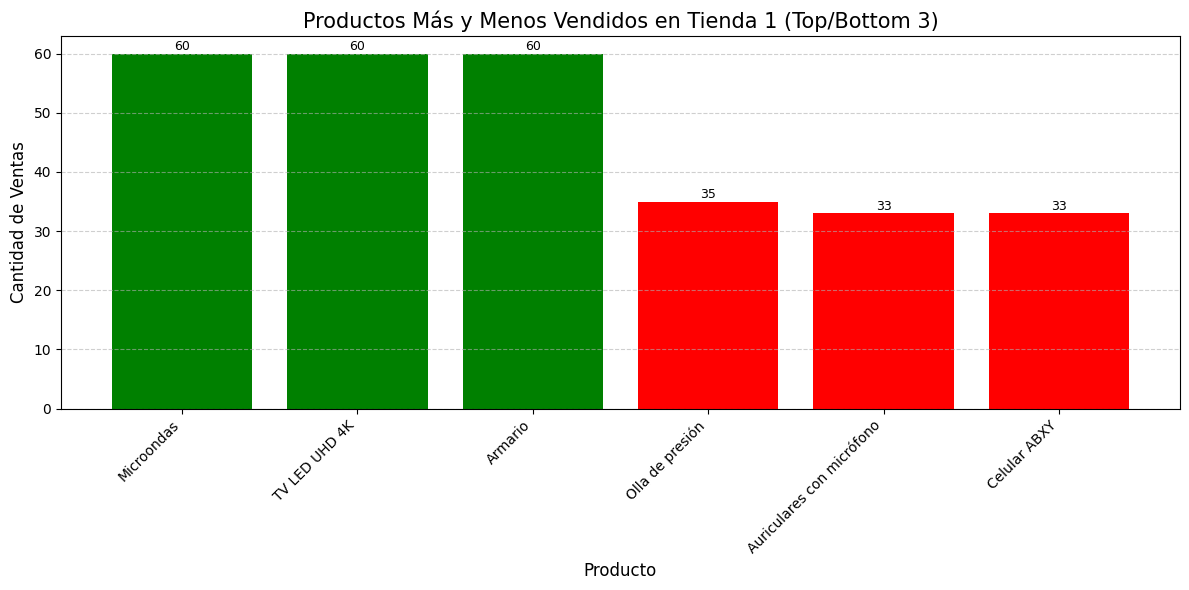

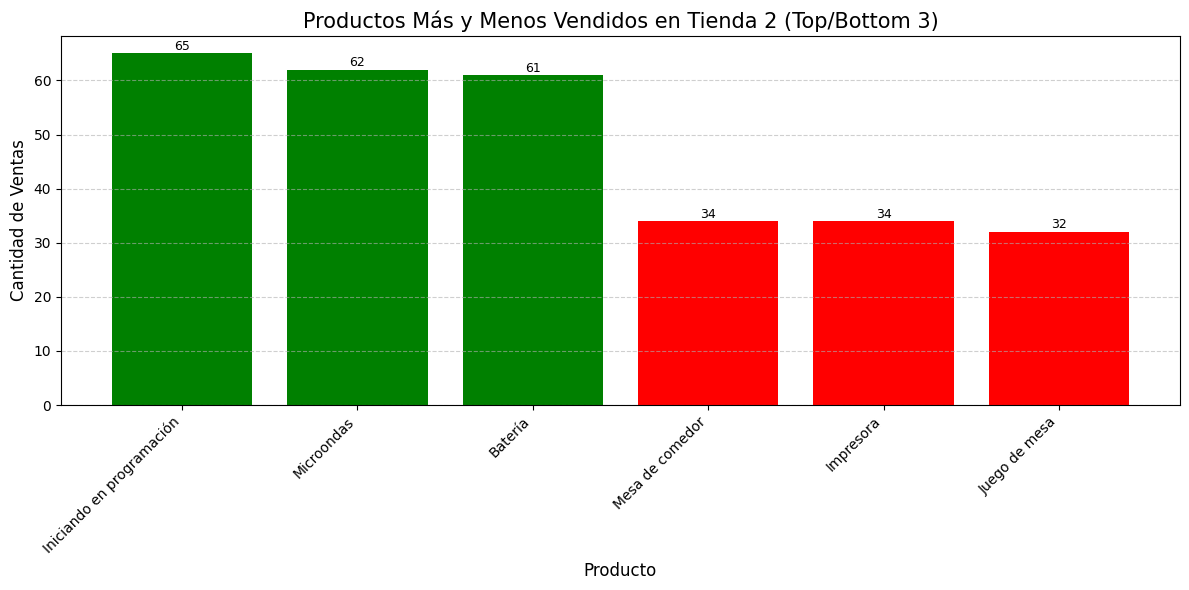

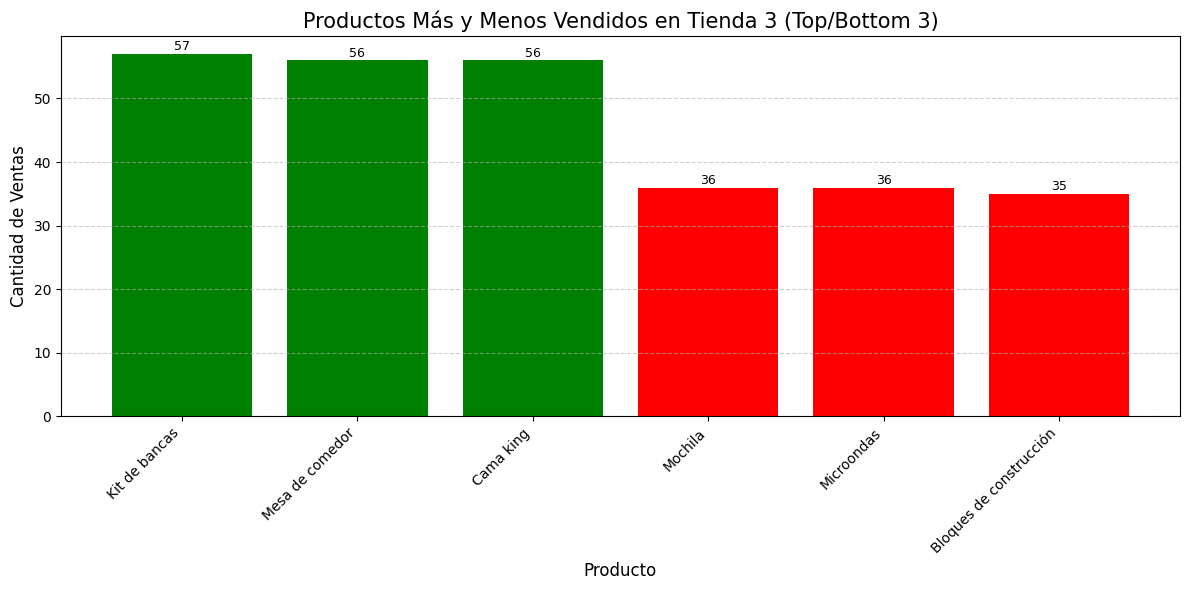

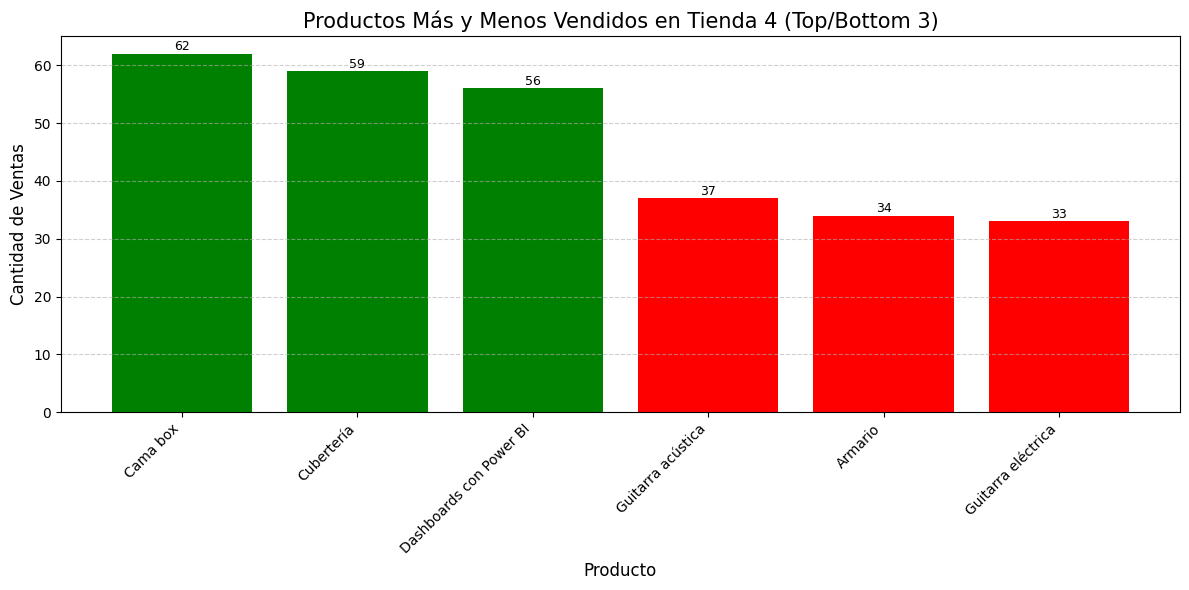

In [95]:
dataframes_tiendas = [tienda, tienda2, tienda3, tienda4]
nombres_tiendas = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]


def graficar_top_y_bottom_productos(df, nombre_tienda, n=3):
    
    conteo_productos = df['Producto'].value_counts()
    
    top_n = conteo_productos.head(n)
    bottom_n = conteo_productos.tail(n)
    
    productos_a_graficar = pd.concat([top_n, bottom_n]).sort_values(ascending=False)

    colores = ['green'] * len(top_n) + ['red'] * len(bottom_n)
    
    if len(productos_a_graficar) < (2 * n):
        colores = ['green'] * len(top_n) + ['red'] * (len(productos_a_graficar) - len(top_n))

    
    plt.figure(figsize=(12, 6))
    
    barras = plt.bar(productos_a_graficar.index, productos_a_graficar.values, color=colores)
    
    for bar in barras:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, int(yval), ha='center', va='bottom', fontsize=9)

    plt.title(f'Productos Más y Menos Vendidos en {nombre_tienda} (Top/Bottom {n})', fontsize=15)
    plt.xlabel('Producto', fontsize=12)
    plt.ylabel('Cantidad de Ventas', fontsize=12)
    
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    
    plt.show()


for df, nombre in zip(dataframes_tiendas, nombres_tiendas):
    graficar_top_y_bottom_productos(df, nombre)
    

# 5. Envío promedio por tienda

In [27]:
costo_envio_promedio_tienda = tienda['Costo de envío'].mean()

print(f"El costo promedio de envío en tienda es: ${costo_envio_promedio_tienda:,.0f}")

costo_envio_promedio_tienda2 = tienda2['Costo de envío'].mean()

print(f"El costo promedio de envío en tienda 2 es: ${costo_envio_promedio_tienda2:,.0f}")

costo_envio_promedio_tienda3 = tienda3['Costo de envío'].mean()

print(f"El costo promedio de envío en tienda 3 es: ${costo_envio_promedio_tienda3:,.0f}")

costo_envio_promedio_tienda4 = tienda4['Costo de envío'].mean()

print(f"El costo promedio de envío en tienda 4 es: ${costo_envio_promedio_tienda4:,.0f}")

El costo promedio de envío en tienda es: $26,019
El costo promedio de envío en tienda 2 es: $25,216
El costo promedio de envío en tienda 3 es: $24,806
El costo promedio de envío en tienda 4 es: $23,459


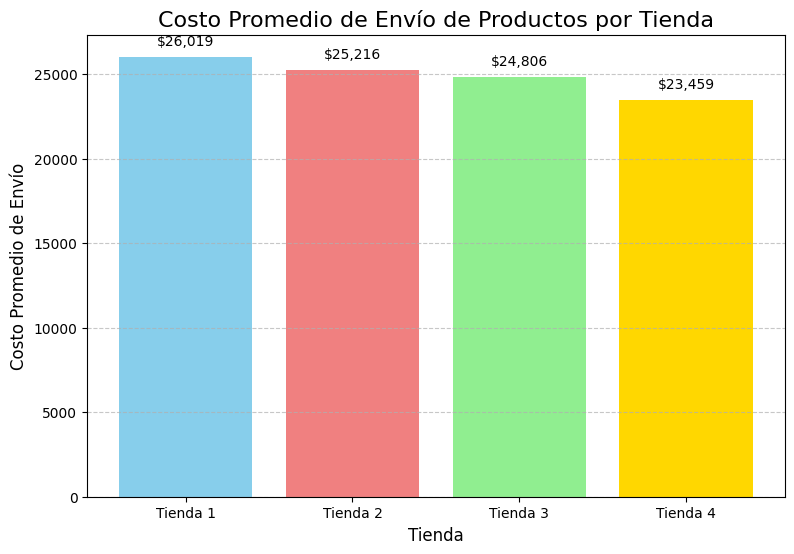

In [102]:
costos_promedio_envio = (
    tienda['Costo de envío'].mean(), 
    tienda2['Costo de envío'].mean(), 
    tienda3['Costo de envío'].mean(), 
    tienda4['Costo de envío'].mean()
)
df_costos = pd.DataFrame({
    'Tienda': nombres_tiendas,
    'Costo Promedio de Envío': costos_promedio_envio
})


plt.figure(figsize=(9, 6))

barras = plt.bar(df_costos['Tienda'], df_costos['Costo Promedio de Envío'], 
                 color=['skyblue', 'lightcoral', 'lightgreen', 'gold'])


for bar in barras:
    yval = bar.get_height()
    
    plt.text(bar.get_x() + bar.get_width()/2, yval + 500, f'${yval:,.0f}', ha='center', va='bottom', fontsize=10)


plt.title('Costo Promedio de Envío de Productos por Tienda', fontsize=16)
plt.xlabel('Tienda', fontsize=12)
plt.ylabel('Costo Promedio de Envío', fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()